<a href="https://colab.research.google.com/github/Many98/real_estate/blob/models/notebooks/results_exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install -U pandas-profiling

In [3]:
import numpy as np
import pandas as pd
# from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import string

In [4]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/result.csv', sep=',', delimiter=None, encoding="utf8")

In [15]:
from google.colab import drive
drive.mount('/content/drive/')
# Path to our data on google drive
DATA_PATH = "/content/drive/MyDrive/reality/"

Mounted at /content/drive/


In [16]:
df_nopred = pd.read_csv('/content/drive/MyDrive/reality/dataset_2.csv', sep=',', delimiter=None, encoding="utf8")
#df.drop(columns=df.columns[0], axis=1, inplace=True) 

df_nopred['price_m2'] = df_nopred["price"]/df_nopred["usable_area"]
df_nopred['gp'] = df_nopred['gp_mean_price'] * df_nopred["usable_area"]

In [18]:
df_nopred['description'].nunique()

7453

In [28]:
dfinal = pd.merge(df, df_nopred, on="description", how="left")

In [26]:
dfinal.describe()

,price_x,price_m2_x,xgb,gp_x,usable_area_x,subway_station_dist_x,atm_dist,bus_station_dist,daily_noise,desc_hash,doctor_dist,floor,floor_area,gp_ci_high_price,gp_ci_low_price,gp_mean_price,gp_std_price,hash,kindergarten_dist,lat,long,nightly_noise,pharmacy_dist,playground_dist,post_office_dist,price_y,primary_school_dist,restaurant_pub_dist,sports_field_dist,subway_station_dist_y,supermarket_grocery_dist,theatre_cinema_dist,train_station_dist,tram_station_dist,usable_area_y,vet_dist,year_reconstruction,park_dist,price_m2_y,gp_y
count,7.206000e+03,7206.000000,7.206000e+03,7.206000e+03,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7.206000e+03,7206.000000,7206.000000,0.0,7206.000000,7206.000000,7206.000000,7206.000000,7.206000e+03,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7.206000e+03,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7.206000e+03
mean,8.946411e+06,130634.007875,8.954110e+06,8.654439e+06,69.869414,1009.025101,476.791179,194.857840,53.811407,9.259746e+18,1363.256362,3.735498,NaN,185036.689004,60611.423519,122824.056261,31106.316371,9.143235e+18,417.914666,50.073863,14.451650,47.062170,555.904457,201.928983,667.642505,8.946411e+06,378.932873,238.521832,416.535459,1721.838451,374.823798,1602.693915,2293.075255,1313.132273,69.869414,963.058655,2036.724396,580.871426,130634.007875,8.654439e+06
std,5.364348e+06,35490.428697,5.265826e+06,4.966645e+06,36.487508,1116.963613,866.407409,127.566005,10.158321,5.350351e+18,1967.358878,2.529709,NaN,11496.087240,11746.874476,11615.325151,199.225082,5.350396e+18,1035.158010,0.034792,0.070151,10.038829,891.574363,369.190745,909.940155,5.364348e+06,680.284947,382.050673,701.099196,2391.163943,819.157881,2166.083978,2885.795330,2264.456963,36.487508,1751.201814,5.035511,1494.049199,35490.428697,4.966645e+06
min,1.190000e+06,41161.048689,1.319109e+06,1.425317e+06,11.000000,-999.000000,0.000000,5.464500,5.000000,2.010773e+15,0.000000,-1.000000,NaN,155286.085826,31236.466963,93468.480517,29783.736089,2.971208e+15,0.000000,49.955344,14.266679,5.000000,0.000000,11.000000,0.000000,1.190000e+06,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,38.656595,6.000000,11.000000,0.000000,1989.000000,2.109320,41161.048689,1.425317e+06
25%,5.850000e+06,104472.014925,5.906305e+06,5.667372e+06,47.000000,365.000000,203.000000,97.096422,45.000000,4.562791e+18,469.000000,2.000000,NaN,175949.883824,51377.226920,113666.766648,31029.608533,4.505844e+18,166.000000,50.047070,14.408039,40.000000,250.000000,98.000000,339.000000,5.850000e+06,171.404880,103.000000,200.853751,473.736397,152.423826,452.000000,852.000000,175.000000,47.000000,320.981334,2038.000000,169.495003,104472.014925,5.667372e+06
50%,7.400000e+06,126454.378714,7.392655e+06,7.541948e+06,63.000000,728.000000,332.000000,169.000000,50.000000,9.315745e+18,776.000000,3.000000,NaN,182649.007400,58385.183160,120562.242643,31125.951251,9.118910e+18,266.000000,50.073210,14.452572,45.000000,412.000000,167.000000,551.000000,7.400000e+06,287.000000,195.000000,332.000000,834.000000,261.000000,1008.000000,1243.000000,410.000000,63.000000,589.000000,2038.000000,285.721616,126454.378714,7.541948e+06
75%,1.049000e+07,151101.743333,1.039152e+07,1.005480e+07,83.000000,1448.000000,535.000000,253.000000,60.000000,1.393552e+19,1299.750000,5.000000,NaN,191901.116829,67419.779708,129629.815121,31215.947368,1.373593e+19,402.000000,50.101624,14.502256,55.000000,676.000000,256.000000,804.031477,1.049000e+07,448.000000,310.000000,468.000000,1931.750000,408.000000,1789.000000,1919.250000,1598.000000,83.000000,917.000000,2038.000000,490.031757,151101.743333,1.005480e+07
max,1.290000e+08,336170.212766,1.287969e+08,1.267352e+08,892.000000,6229.000000,10000.000000,936.516612,80.000000,1.844567e+19,10000.000000,20.000000,NaN,224607.713552,102042.629593,162801.448407,31738.245689,1.844367e+19,10000.000000,50.163468,

In [29]:
dfinal.columns

Index(['price_x', 'price_m2_x', 'xgb', 'gp_x', 'usable_area_x', 'ownership_x',
       'city_district_x', 'subway_station_dist_x', 'energy_effeciency_x',
       'disposition_x', 'description', 'city_district_y',
       'additional_disposition', 'air_quality', 'atm_dist', 'built_density',
       'bus_station_dist', 'construction_type', 'daily_noise', 'date',
       'desc_hash', 'disposition_y', 'doctor_dist', 'electricity',
       'electricity_txt', 'energy_effeciency_y', 'equipment', 'floor',
       'floor_area', 'gas', 'geometry', 'gp_ci_high_price', 'gp_ci_low_price',
       'gp_mean_price', 'gp_std_price', 'has_balcony', 'has_cellar',
       'has_garage', 'has_garden', 'has_lift', 'has_loggia', 'has_parking',
       'hash', 'header', 'heating', 'heating_txt', 'kindergarten_dist', 'lat',
       'long', 'name', 'nightly_noise', 'no_barriers', 'note', 'ownership_y',
       'pharmacy_dist', 'place', 'playground_dist', 'post_office_dist',
       'price_y', 'primary_school_dist', 'restaura

In [30]:
df2 = dfinal[dfinal.columns.difference(['additional_disposition', 'air_quality',
                                        'daily_noise', 'date', 'desc_hash',
                                        'gp_ci_high_price', 'gp_ci_low_price', 
                                        'gp_mean_price', 'gp_std_price','hash', 
                                        'header', 'name', 'nightly_noise', 'no_barriers', 
                                        'note', 'ownership_y', 'subway_station_dist_y',
                                        'tags', 'telecomunication',
                                        'telecomunication_txt', 'waste',
                                        'waste_txt','usable_area_y', 'price_y'
                                        'price_m2_y', 'gp_y'])]

In [31]:
df2.columns

Index(['atm_dist', 'built_density', 'bus_station_dist', 'city_district_x',
       'city_district_y', 'construction_type', 'description', 'disposition_x',
       'disposition_y', 'doctor_dist', 'electricity', 'electricity_txt',
       'energy_effeciency_x', 'energy_effeciency_y', 'equipment', 'floor',
       'floor_area', 'gas', 'geometry', 'gp_x', 'has_balcony', 'has_cellar',
       'has_garage', 'has_garden', 'has_lift', 'has_loggia', 'has_parking',
       'heating', 'heating_txt', 'kindergarten_dist', 'lat', 'long',
       'ownership_x', 'park_dist', 'pharmacy_dist', 'place', 'playground_dist',
       'post_office_dist', 'price_m2_x', 'price_x', 'price_y',
       'primary_school_dist', 'restaurant_pub_dist', 'sports_field_dist',
       'state', 'subway_station_dist_x', 'sun_glare',
       'supermarket_grocery_dist', 'theatre_cinema_dist', 'train_station_dist',
       'tram_station_dist', 'transport', 'usable_area_x', 'vet_dist', 'xgb',
       'year_reconstruction'],
      dtype='obje

## Here we have predictions and all variables availabel for the prediction.

In [33]:
df2['xgb_diff'] = df2['xgb'] - df2['price_x']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
properties = ['has_balcony', 'has_cellar', 'has_garage', 'has_garden', 
              'has_lift', 'has_loggia', 'has_parking']

In [37]:
def des_properties(df, properties, price_diff):
  for property in properties:
    print(property)
    print(df.groupby(property).describe()[price_diff])

In [38]:
des_properties(df2, properties, 'xgb_diff')

has_balcony
              count          mean           std         min        25%  \
has_balcony                                                              
False        5271.0   5208.267976  1.125904e+06 -12944722.0 -448935.75   
True         1935.0  14483.469302  1.204912e+06 -13698996.0 -399475.75   

                 50%        75%         max  
has_balcony                                  
False        38610.5  506180.50  17371984.0  
True         46580.0  444259.25  20615400.0  
has_cellar
             count         mean           std         min         25%  \
has_cellar                                                              
False       2890.0  9223.891972  1.279490e+06 -13698996.0 -445764.500   
True        4316.0  6677.767794  1.050180e+06 -10694041.0 -431931.375   

                 50%         75%         max  
has_cellar                                    
False       44941.25  494761.375  20615400.0  
True        35808.50  491351.000  14324336.0  
has_garage
    

## Percentage change for price

In [39]:
df2['xgb_diff_perc'] = df2['xgb_diff']/df2['price_x']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
des_properties(df2, properties, 'xgb_diff_perc')

has_balcony
              count      mean       std       min       25%       50%  \
has_balcony                                                             
False        5271.0  0.016021  0.121981 -0.534970 -0.054226  0.005027   
True         1935.0  0.012177  0.110450 -0.383725 -0.044654  0.005482   

                  75%       max  
has_balcony                      
False        0.072497  1.048447  
True         0.053378  1.131236  
has_cellar
             count      mean       std       min       25%       50%  \
has_cellar                                                             
False       2890.0  0.018048  0.132280 -0.405083 -0.053859  0.006305   
True        4316.0  0.012940  0.109176 -0.534970 -0.051364  0.004702   

                 75%       max  
has_cellar                      
False       0.068358  1.131236  
True        0.066126  1.018120  
has_garage
             count      mean       std       min       25%       50%  \
has_garage                                  

In [42]:
import seaborn as sns

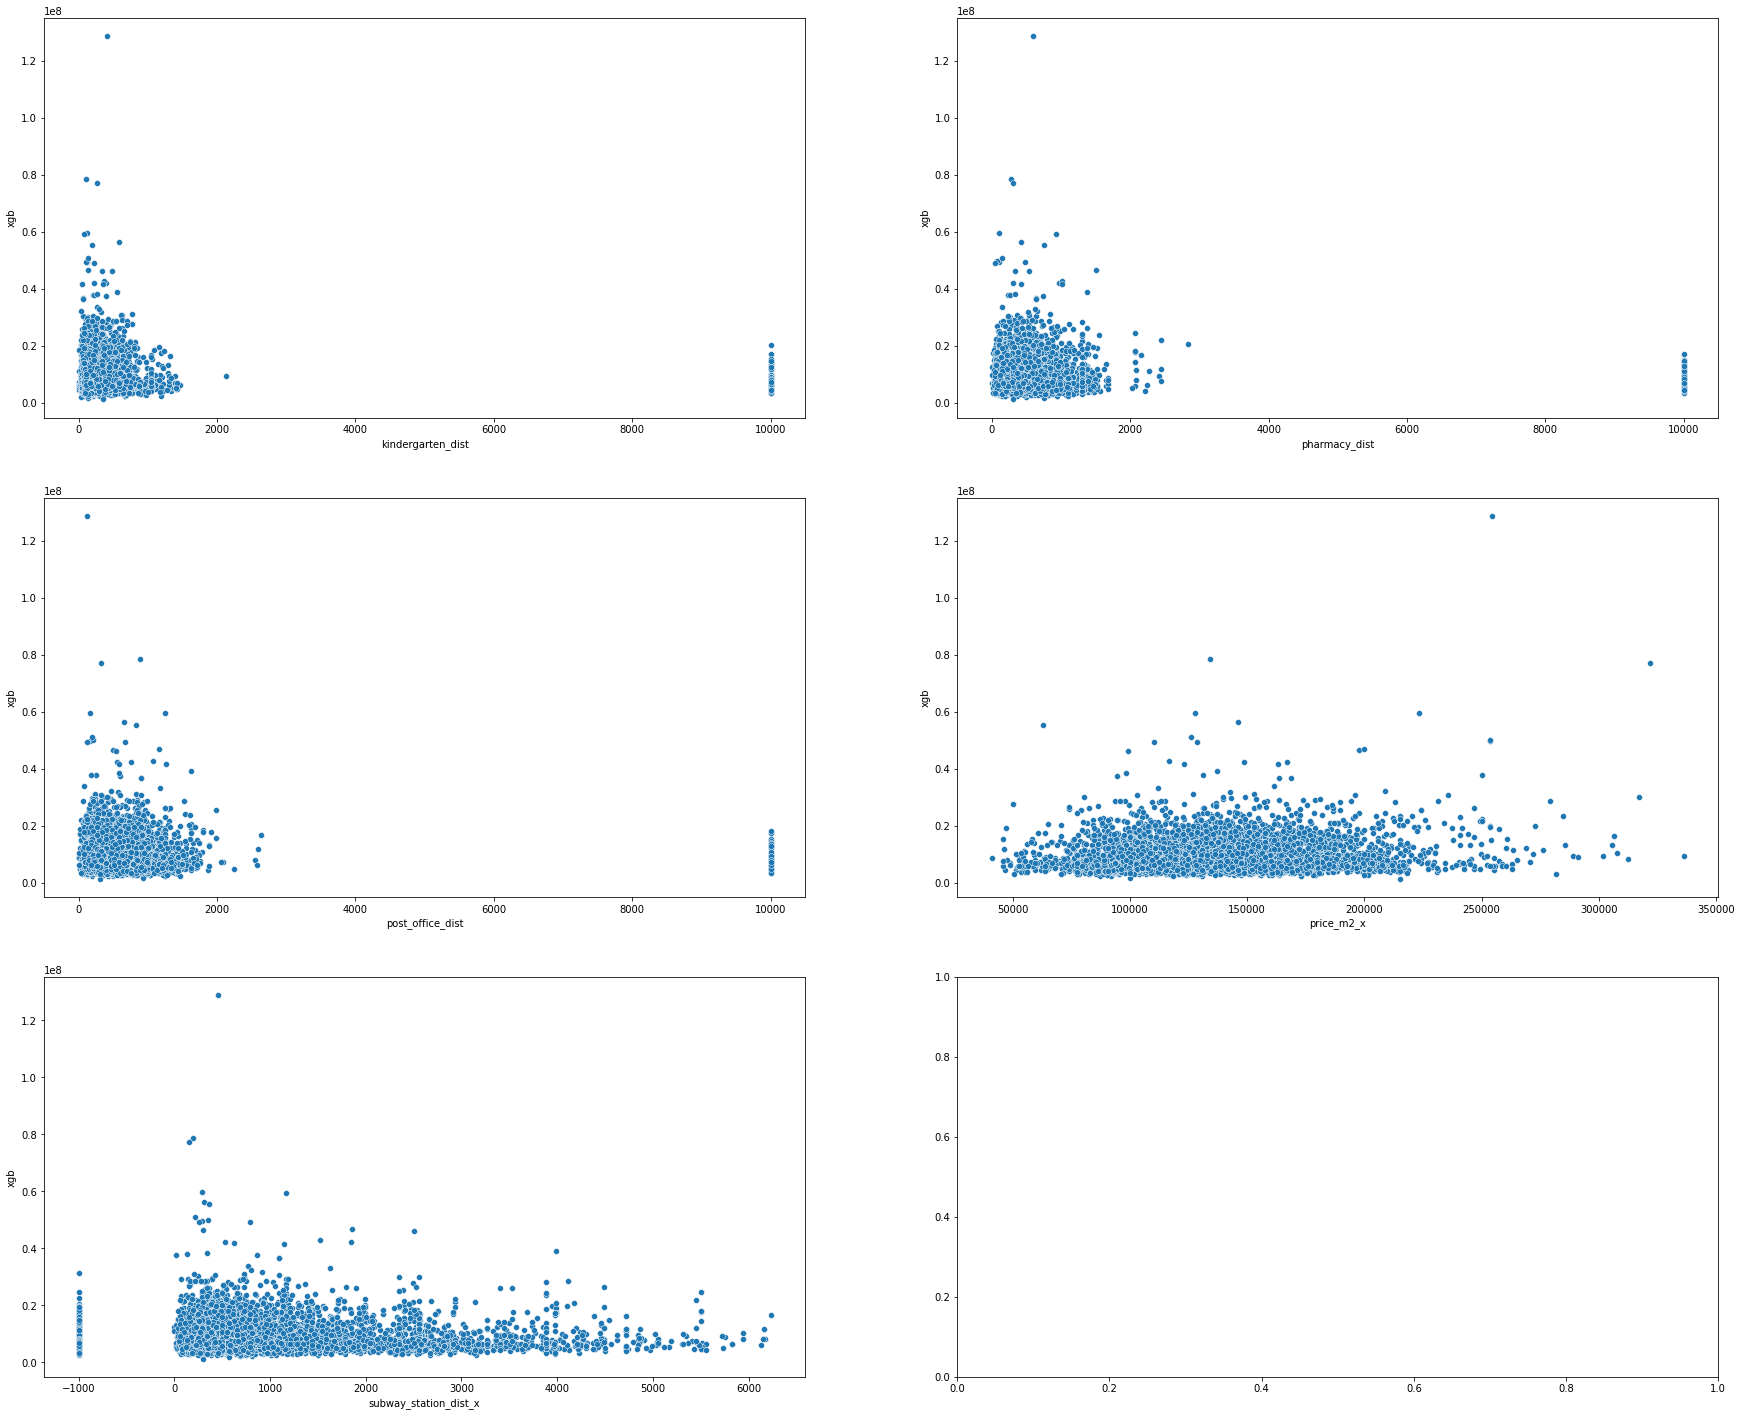

In [45]:
fig, axes = plt.subplots(3, 2, figsize=(30, 25))
axes = axes.flatten()

suspected = ['kindergarten_dist', 'pharmacy_dist', 'post_office_dist', 
             'price_m2_x', 'subway_station_dist_x']
no=[0,1,2,3,4]
df_help = df2[suspected]

for n, i in zip(no,suspected):
    sns.scatterplot(ax = axes[n],data=df_help,x=i, y=df['xgb'])
plt.show()

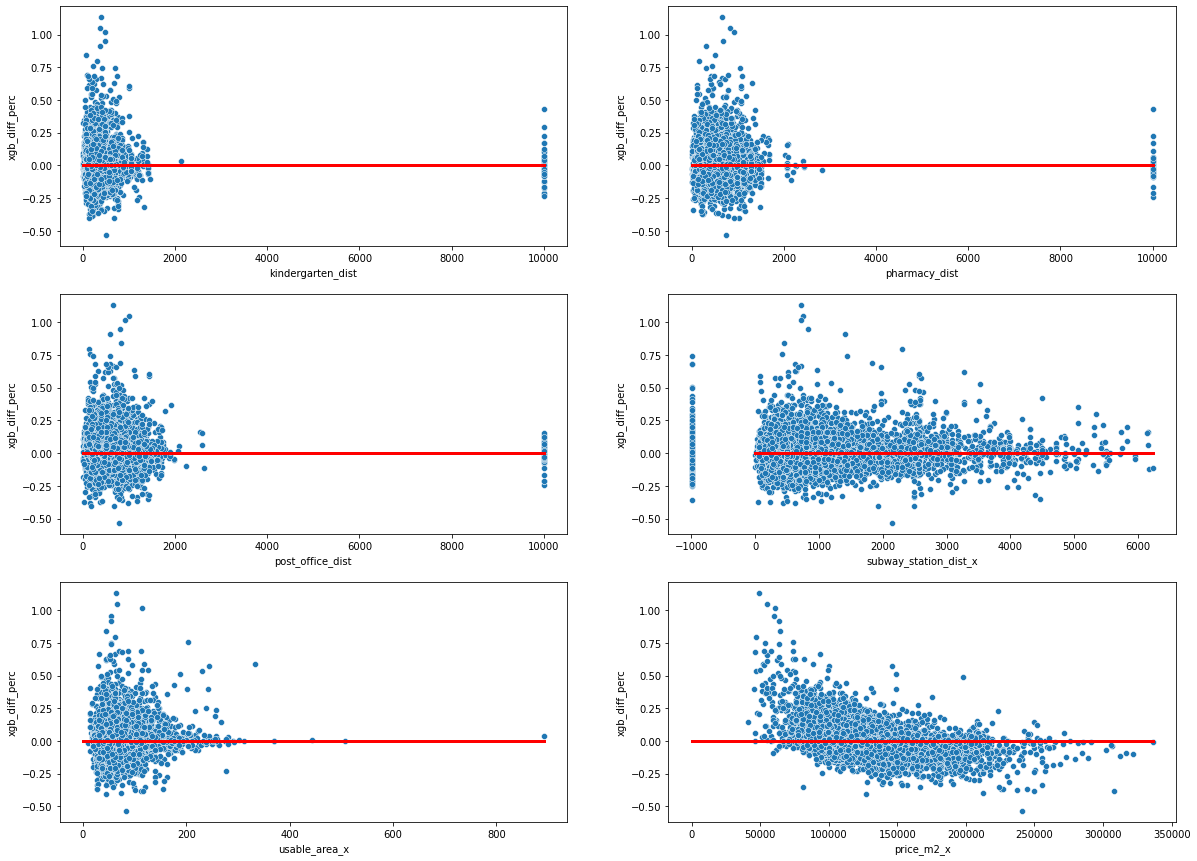

In [58]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
axes = axes.flatten()

suspected = ['kindergarten_dist', 'pharmacy_dist', 'post_office_dist', 
             'subway_station_dist_x', 'usable_area_x', 'price_m2_x']
no=[0,1,2,3,4,5]
df_help = df2[suspected]

for n, i in zip(no,suspected):
    sns.scatterplot(ax = axes[n],data=df_help,x=i, y=df2['xgb_diff_perc'])
    sns.lineplot(ax = axes[n], x = [0, np.max(df_help[i])], y = [0, 0], linewidth=3, color = 'r')
plt.show()

Now following with has_ properties

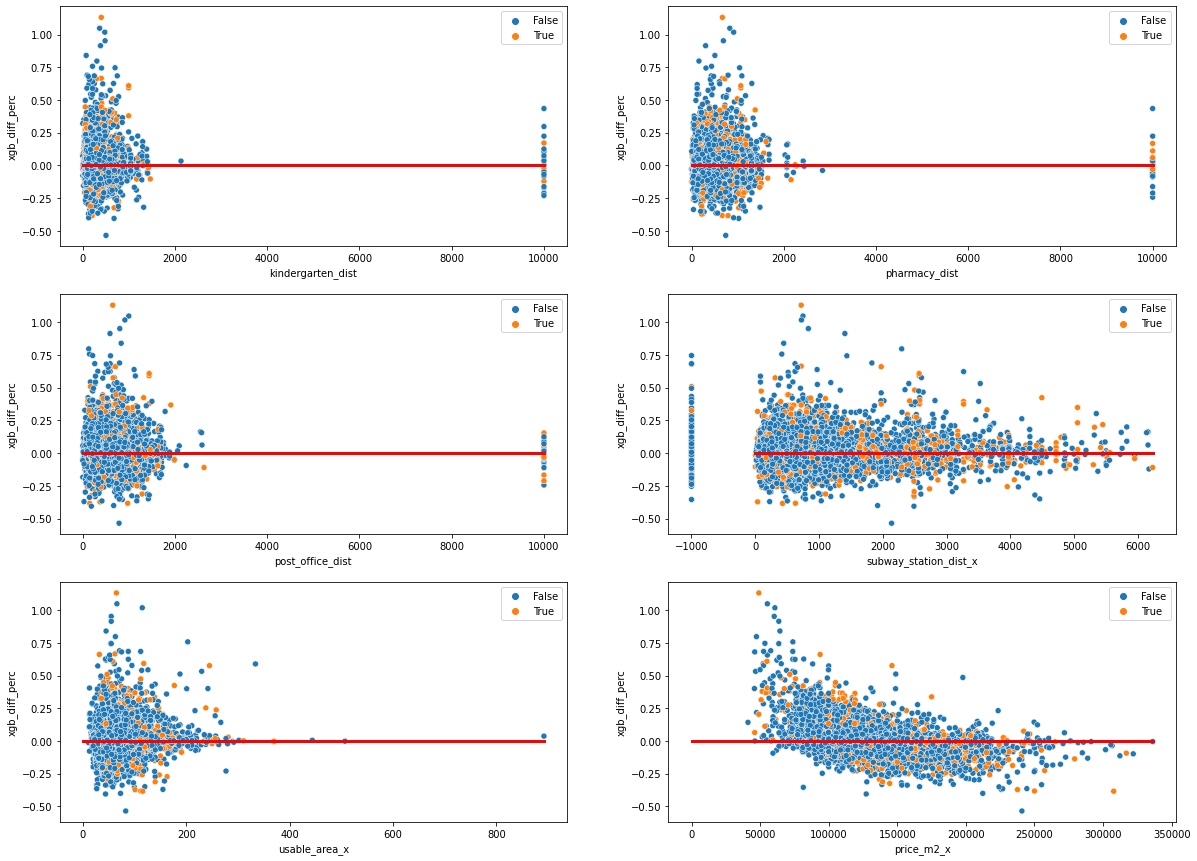

In [61]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
axes = axes.flatten()

suspected = ['kindergarten_dist', 'pharmacy_dist', 'post_office_dist', 
             'subway_station_dist_x', 'usable_area_x', 'price_m2_x']
no=[0,1,2,3,4,5]
df_help = df2[suspected]

# properties = ['has_balcony', 'has_cellar', 'has_garage', 'has_garden', 
#               'has_lift', 'has_loggia', 'has_parking']

for n, i in zip(no,suspected):
    sns.scatterplot(ax = axes[n],data=df_help,x=i, y=df2['xgb_diff_perc'], hue=df2[properties[0]])
    sns.lineplot(ax = axes[n], x = [0, np.max(df_help[i])], y = [0, 0], linewidth=3, color = 'r')
plt.show()

## Previous stuff

In [7]:
df.head()

,price,price_m2,xgb,gp,usable_area,ownership,city_district,subway_station_dist,energy_effeciency,disposition,description
0,4144000.0,188363.636364,3986350.0,3.025544e+06,22.0,Osobní,Praha 7,808.0,unknown,1+kk,Lukrativní lokalita v blízkosti parku Stromovk...
1,6842000.0,263153.846154,6532088.5,4.084852e+06,26.0,Osobní,Praha 1,269.0,G,1+kk,Dovolujeme si nabídnout k prodeji byt 1+kk o v...
2,6490000.0,106393.442623,5994148.0,7.296118e+06,61.0,Osobní,Praha 4,1238.0,E,1+1,Exkluzivně vám nabízím k prodeji velkorysý byt...
3,6909025.0,160675.000000,6571988.5,5.748378e+06,43.0,Osobní,Praha 7,993.0,B,1+kk,"Světlý byt v SO-HO Rezidenci o dispozici 1,5+k..."
4,5819600.0,161655.555556,5844206.5,4.812596e+06,36.0,Osobní,Praha 7,993.0,B,1+kk,"Útulný byt v SO-HO Rezidenci o dispozici 1,5+k..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7198 entries, 0 to 7197
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                7198 non-null   float64
 1   price_m2             7198 non-null   float64
 2   xgb                  7198 non-null   float64
 3   gp                   7198 non-null   float64
 4   usable_area          7198 non-null   float64
 5   ownership            7198 non-null   object 
 6   city_district        7198 non-null   object 
 7   subway_station_dist  7198 non-null   float64
 8   energy_effeciency    7198 non-null   object 
 9   disposition          7198 non-null   object 
 10  description          7198 non-null   object 
dtypes: float64(6), object(5)
memory usage: 618.7+ KB


In [14]:
df['price'].nunique()

2508

In [ ]:
df.describe(include='all')

,price,price_m2,xgb,gp,usable_area,ownership,city_district,subway_station_dist,energy_effeciency,disposition,description
count,7.198000e+03,7198.000000,7.198000e+03,7.198000e+03,7198.000000,7198,7198,7198.000000,7198,7198,7198
unique,NaN,NaN,NaN,NaN,NaN,4,53,NaN,8,13,7194
top,NaN,NaN,NaN,NaN,NaN,Osobní,Praha 5,NaN,G,2+kk,Nabízíme prémiové moderní bydlení ve skvělé lo...
freq,NaN,NaN,NaN,NaN,NaN,6149,760,NaN,2034,2144,2
mean,8.938960e+06,130606.589020,8.947093e+06,8.651355e+06,69.837594,NaN,NaN,1009.961500,NaN,NaN,NaN
std,5.355788e+06,35490.719433,5.258164e+06,4.965729e+06,36.464892,NaN,NaN,1117.005328,NaN,NaN,NaN
min,1.190000e+06,41161.048689,1.319109e+06,1.425317e+06,11.000000,NaN,NaN,-999.000000,NaN,NaN,NaN
25%,5.850000e+06,104456.293706,5.906086e+06,5.665477e+06,47.000000,NaN,NaN,365.000000,NaN,NaN,NaN
50%,7.400000e+06,126440.613027,7.391924e+06,7.541948e+06,63.000000,NaN,NaN,728.000000,NaN,NaN,NaN
75%,1.049000e+07,151025.641026,1.038929e+07,1.004854e+07,83.000000,NaN,NaN,1450.500000,NaN,NaN,NaN


Pandas profilling did not provided any hints

In [ ]:
# profile = ProfileReport(df, title='Reality results', html={'style':{'full_width':True}})
# profile.to_notebook_iframe()

In [ ]:
df_results = df.copy()

In [ ]:
df_results.columns

Index(['price', 'price_m2', 'xgb', 'gp', 'usable_area', 'ownership',
       'city_district', 'subway_station_dist', 'energy_effeciency',
       'disposition', 'description'],
      dtype='object')

## Setting up the differences in predicted and real prices

In [ ]:
df_results['xgb_diff'] = df_results['xgb'] - df_results['price']
df_results['gp_diff'] = df_results['gp'] - df_results['price']

E.g. positive values means overvaluation and negative undervaluation 

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/hist.py:382: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


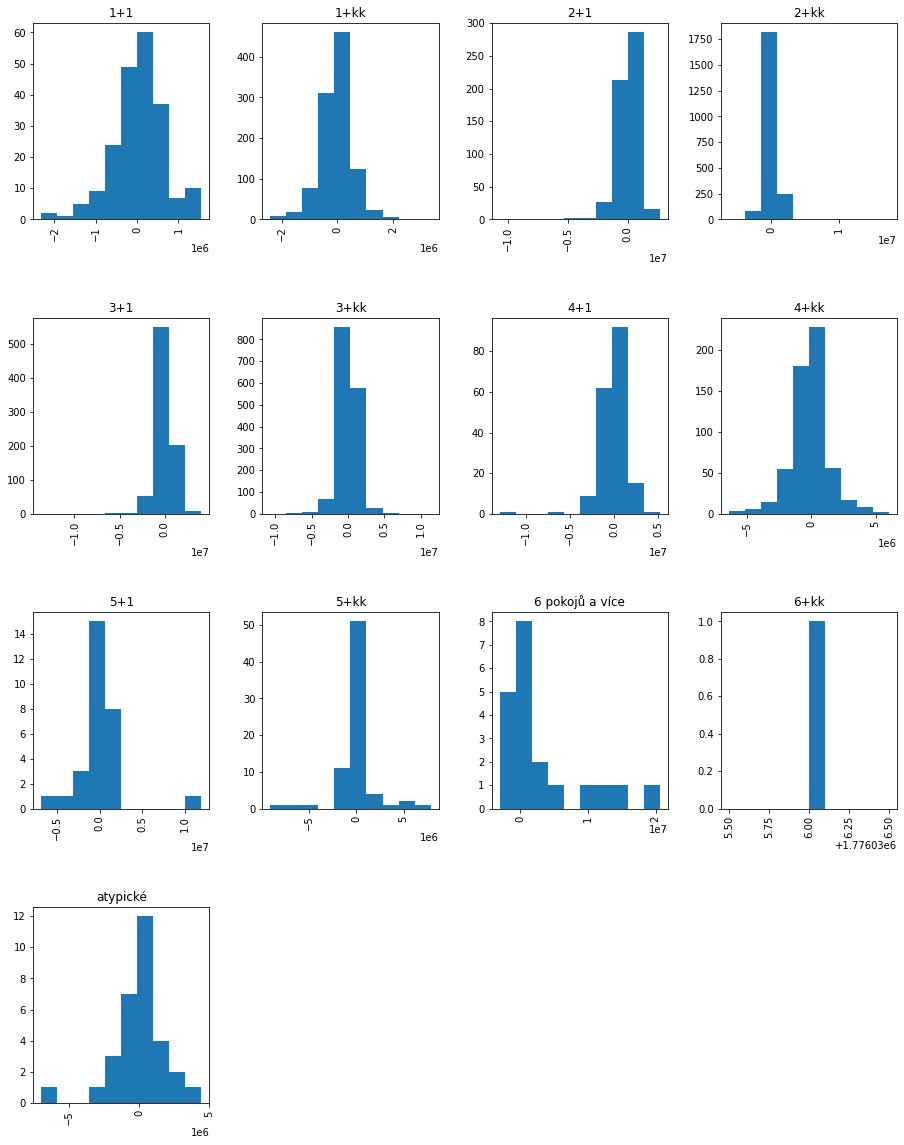

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_results['xgb_diff'].hist(by=df_results['disposition'], ax = ax)
plt.show()

6>= rooms and 6+kk seems to be overvaluated in XGBoost.

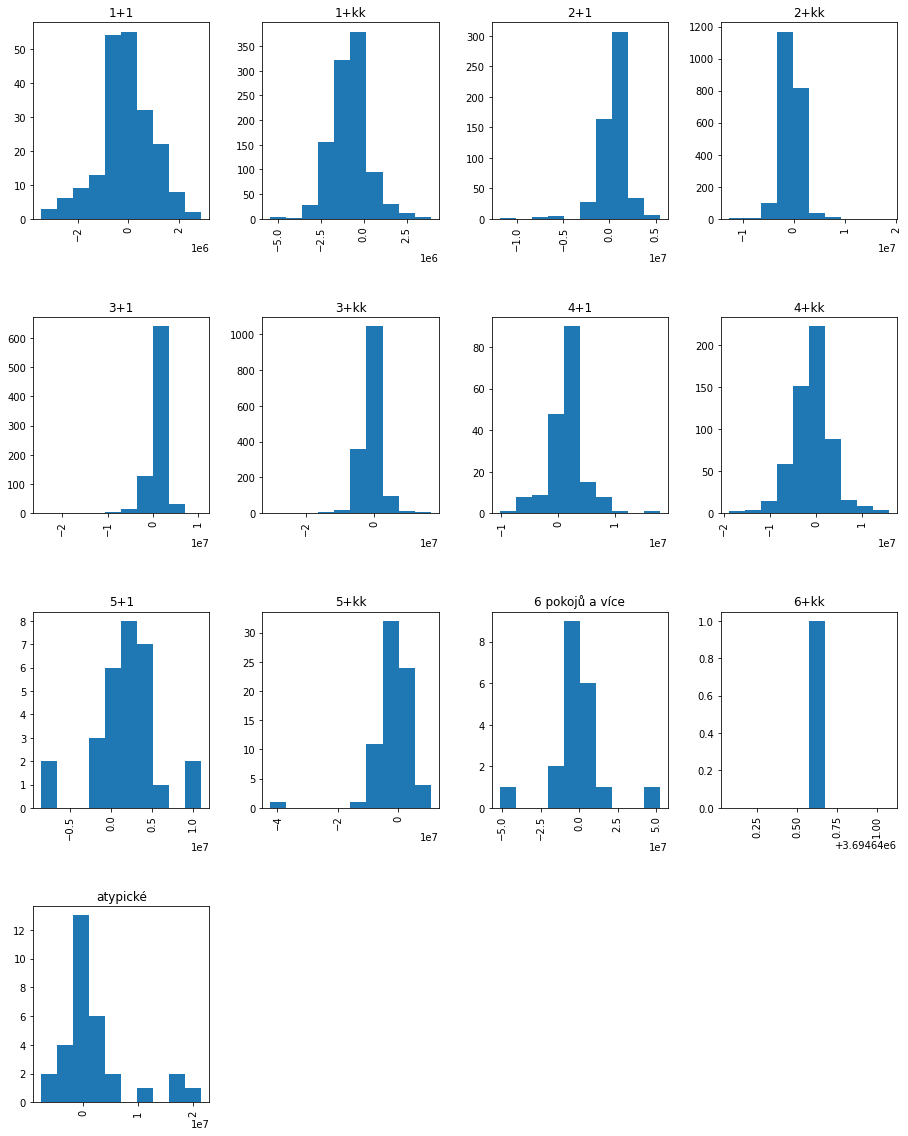

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_results['gp_diff'].hist(by=df_results['disposition'], ax = ax)
plt.show()

Atypical disposition has some problems in GP.

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/hist.py:382: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


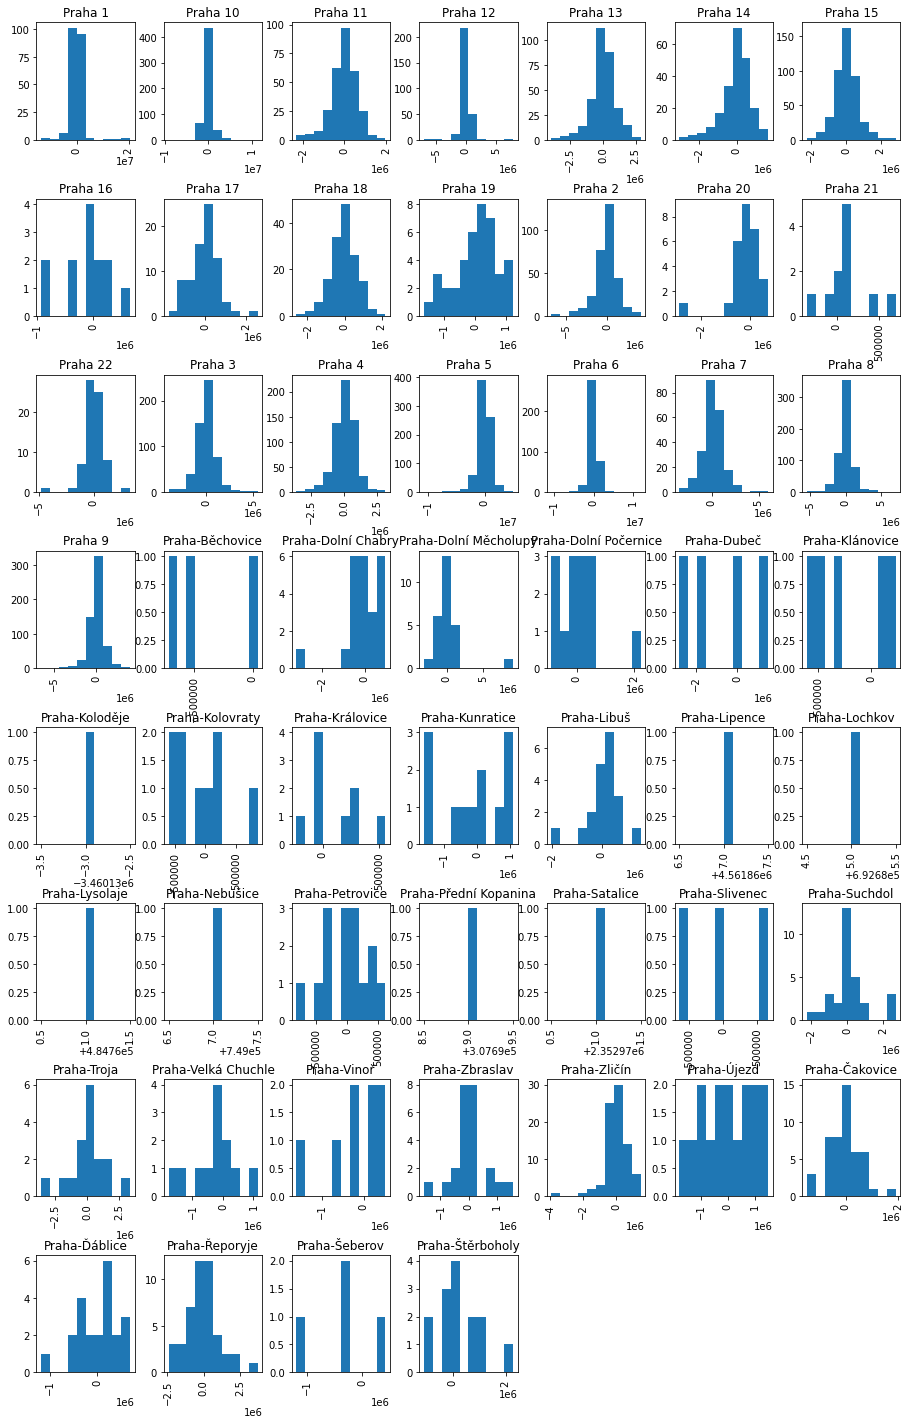

In [ ]:
fig = plt.figure(figsize = (15,25))
ax = fig.gca()
df_results['xgb_diff'].hist(by=df_results['city_district'], ax = ax)
plt.show()

City districts seems OK for XGBoost

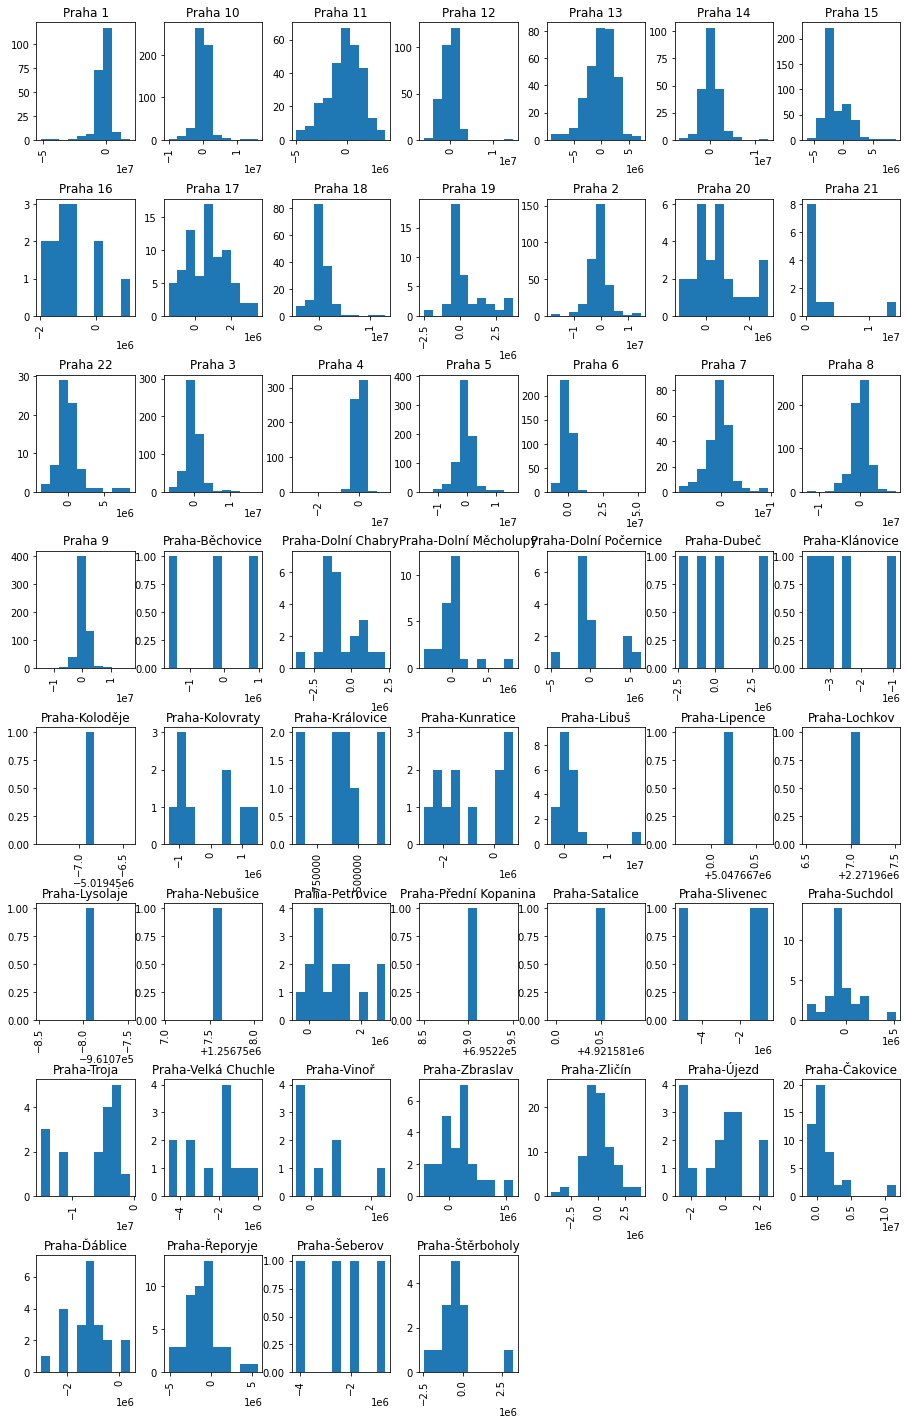

In [ ]:
fig = plt.figure(figsize = (15,25))
ax = fig.gca()
df_results['gp_diff'].hist(by=df_results['city_district'], ax = ax)
plt.show()

City district seems to have some impact for GP:
Undervaluation for Praha-Šeberov, Praha-Ďáblice, Praha-Velká Chuchle, Praha-Troja, Praha-Klánovice

Overvaluation for Praha-Čakovice, Praha-Zbraslav, Praha-Petrovice, Praha 17 maybe even Praha 20

For XGBoost there is no significant differences.

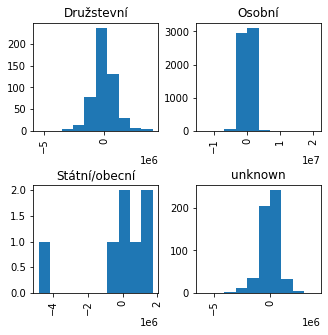

In [ ]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
df_results['xgb_diff'].hist(by=df_results['ownership'], ax = ax)
plt.show()

Seems OK

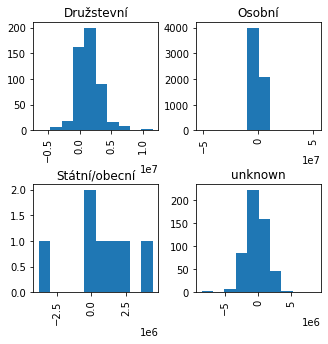

In [ ]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
df_results['gp_diff'].hist(by=df_results['ownership'], ax = ax)
plt.show()

For GP we can see slight shift towards overvaluation for Družstevní ownership.

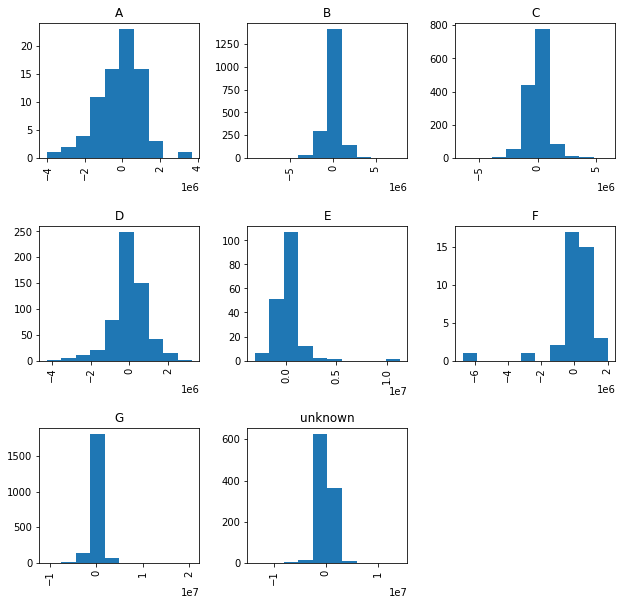

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df_results['xgb_diff'].hist(by=df_results['energy_effeciency'], ax = ax)
plt.show()

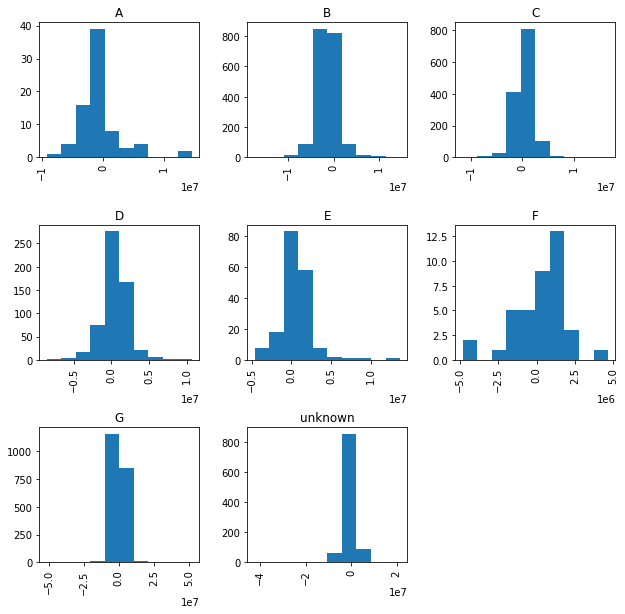

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df_results['gp_diff'].hist(by=df_results['energy_effeciency'], ax = ax)
plt.show()

Maybe some small shift towards overvaluation for GP in energy_effeciency = F

## Numerical check of results based on properties 

In [ ]:
properties = ['ownership', 'city_district', 'energy_effeciency', 'disposition']

In [ ]:
def des_properties(df, properties, price_diff):
  for property in properties:
    print(property)
    print(df.groupby(property).describe()[price_diff])

In [ ]:
des_properties(df_results, properties, 'xgb_diff')

ownership
                count           mean           std         min       25%  \
ownership                                                                  
Družstevní      509.0    5637.502358  9.729195e+05  -5431921.0 -477490.0   
Osobní         6149.0   11376.791901  1.178250e+06 -13698996.0 -439034.0   
Státní/obecní     7.0 -109042.357143  2.218523e+06  -4793667.0 -248990.5   
unknown         533.0  -25358.852720  9.051437e+05  -6084416.0 -401791.0   

                    50%        75%         max  
ownership                                       
Družstevní      30529.0   454850.0   4078622.0  
Osobní          43011.5   497435.5  20615400.0  
Státní/obecní  360339.0  1219007.5   1729997.5  
unknown         34981.0   475370.0   4030963.0  
city_district
                       count          mean           std         min  \
city_district                                                          
Praha 1                212.0  1.545747e+04  3.025468e+06 -13698996.0   
Praha 10 

XGB_boost seems to have some problems with 6>= rooms and 6+kk. But that might be done by wide spread of data. 

In [ ]:
des_properties(df_results, properties, 'gp_diff')

ownership
                count          mean           std           min           25%  \
ownership                                                                       
Družstevní      509.0  1.446147e+06  1.961521e+06 -6.454123e+06  2.849261e+05   
Osobní         6149.0 -4.390959e+05  2.831718e+06 -5.156615e+07 -1.540915e+06   
Státní/obecní     7.0  7.199917e+05  2.563203e+06 -3.780088e+06 -1.927324e+05   
unknown         533.0 -2.088330e+05  1.763769e+06 -8.555059e+06 -1.163355e+06   

                        50%           75%           max  
ownership                                                
Družstevní     1.243293e+06  2.351933e+06  1.156448e+07  
Osobní        -3.159281e+05  8.472424e+05  5.229619e+07  
Státní/obecní  7.976720e+05  1.980573e+06  4.446678e+06  
unknown       -2.955816e+05  8.578100e+05  8.724672e+06  
city_district
                       count          mean           std           min  \
city_district                                                      

Price differences based on ownership seems to have bigger dispersion in GP than in XGBoost.

GP for disposition seems to overvalue 2+1, 3+1, 4+1 and 5+1, that might be influenced by position of those apartments.

In [ ]:
disp_over_gp = ['2+1', '3+1', '4+1', '5+1']

In [ ]:
def checking(df, names):
  for name in names:
    print(name)
    print(df[df['disposition'] == name].groupby(['city_district']).size())


In [ ]:
checking(df_results, disp_over_gp)

2+1
city_district
Praha 1                   19
Praha 10                 122
Praha 11                   5
Praha 12                  21
Praha 13                   5
Praha 14                  15
Praha 15                  12
Praha 17                   1
Praha 18                  10
Praha 19                   2
Praha 2                   35
Praha 20                   3
Praha 22                   5
Praha 3                   52
Praha 4                   67
Praha 5                   34
Praha 6                   64
Praha 7                   12
Praha 8                   37
Praha 9                   16
Praha-Běchovice            1
Praha-Dolní Počernice      1
Praha-Královice            2
Praha-Libuš                1
Praha-Suchdol              1
Praha-Čakovice             3
dtype: int64
3+1
city_district
Praha 1                25
Praha 10               85
Praha 11               42
Praha 12               34
Praha 13               47
Praha 14               30
Praha 15               19
Praha 16       